## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
#Get the number of mice with a complete timecourse (0 to 45)
# df2 = df.groupby("Mouse ID").filter(lambda x: x["Mouse ID"].shape[0]>=10)
# mus = df2["Mouse ID"].nunique()
# print(f"There are {mus} mice in this study with a complete data set (Timecourse = 0 to 45)")

In [3]:
dup_mice = df.loc[df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
df = df.loc[df["Mouse ID"] != "g989"]

#Total number of mice
total_mice = df["Mouse ID"].nunique()
print(f"There are a total of {total_mice} mice in this dataset")

There are a total of 248 mice in this dataset


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
rx_df = df.groupby(["Drug Regimen"])
tum_mean = round(rx_df["Tumor Volume (mm3)"].mean(),2)
tum_median = round(rx_df["Tumor Volume (mm3)"].median(),2)
tum_var = round(rx_df["Tumor Volume (mm3)"].var(),2)
tum_sd = round(rx_df["Tumor Volume (mm3)"].std(),2)
tum_sem = round(rx_df["Tumor Volume (mm3)"].sem(),2)

tumor_summary_df = pd.DataFrame({"Mean": tum_mean, 
                            "Median":tum_median,
                            "Variance": tum_var,
                            "Std Dev": tum_sd,
                            "SEM": tum_sem
                           }).reset_index()
tumor_summary_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.32,50.45,43.85,6.62,0.54
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


## Bar and Pie Charts

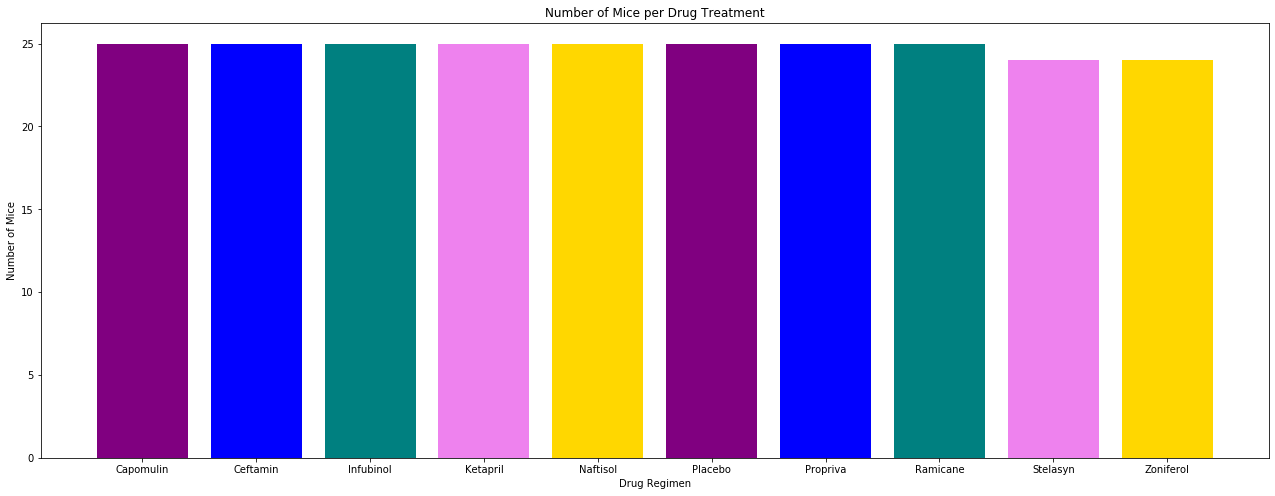

In [6]:
#Using rx_df grouped by Drug Regimen, count number of mice per treatment
df2 = df.groupby(['Drug Regimen','Mouse ID']).count().reset_index()
mice_y= df2["Drug Regimen"].value_counts()
rx_x = tumor_summary_df["Drug Regimen"]
plt.figure(figsize=(22,8))

#Add labels and show
plt.xlabel("Drug Regimen")
plt.title("Number of Mice per Drug Treatment")
plt.ylabel("Number of Mice")

#Create bar graph using pyplot
plt.bar(rx_x, mice_y, color=("purple", "blue", "teal", "violet", "gold"))
plt.show()

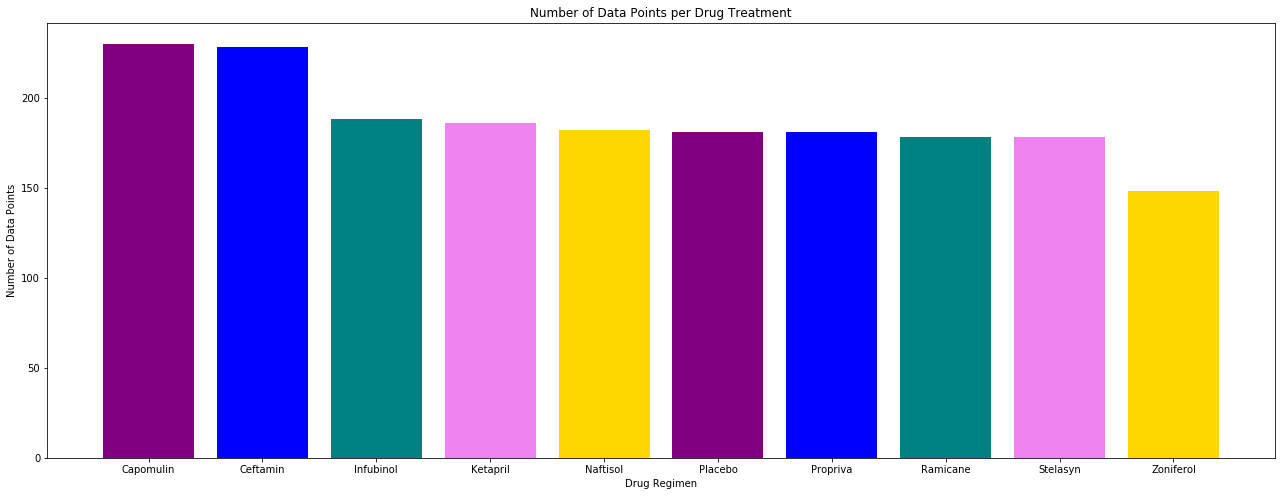

In [7]:
#Using datpoints per Drug Treatment
mice_y= df["Drug Regimen"].value_counts()
rx_x = tumor_summary_df["Drug Regimen"]
plt.figure(figsize=(22,8))

#Create bar graph using pyplot
plt.bar(rx_x, mice_y, color=("purple", "blue", "teal", "violet", "gold"))

#Add labels and show
plt.title("Number of Data Points per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

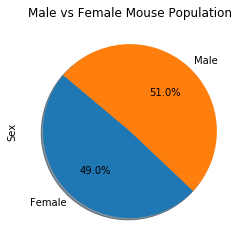

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create a group by object
sex_group = df.groupby("Sex")

#Perform function for calculation of interest
count_sex = sex_group["Sex"].count()

count_sex.plot(kind='pie', 
           autopct="%1.1f%%", 
           shadow=True, 
           startangle=140, 
           figsize=(20,4))

#Add title
plt.title('Male vs Female Mouse Population')
plt.show()

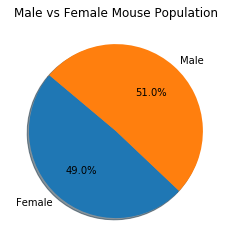

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(count_sex,
        labels = labels,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140)

#Add Title
plt.title('Male vs Female Mouse Population')
plt.show()

## Quartiles, Outliers and Boxplots

In [10]:
## ========= Method 2: Sort and then drop_duplicates =========== ##
# Includes animals that do NOT have a FULL timecourse!!!!
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df.sort_values(by=["Timepoint"], ascending= False)

#Drop duplicates
df2 = df.drop_duplicates(subset="Mouse ID", keep="last")

In [11]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tum_vol = df2.loc[df2["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_list.append(tum_vol)
    quartiles = tum_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 


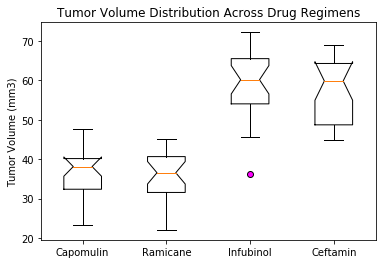

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
purple_circle = dict(markerfacecolor='magenta', marker='o')
fig1, ax1 = plt.subplots()

ax1.set_title("BoxPlot")
ax1.boxplot(tumor_list, notch=True, flierprops=purple_circle)

plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Distribution Across Drug Regimens")
plt.show()

## Line and Scatter Plots

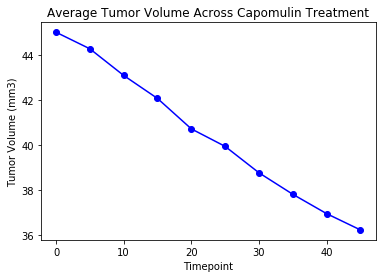

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = df.loc[df["Drug Regimen"] == "Capomulin"]
y_axis = cap_df.groupby("Timepoint").mean()["Tumor Volume (mm3)"]
x_axis = cap_df.groupby("Timepoint").count().reset_index()["Timepoint"]

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume Across Capomulin Treatment")

plt.plot(x_axis, y_axis, marker = "o", color = "blue")
plt.show()

In [103]:
#Create subset of data for Capomulin only
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]
cap_mouseids = [mouse for mouse in cap_df["Mouse ID"]]

# Select a mouse that was treated with Capomulin and generate a line plot of time point versus tumor volume for that mouse.
print(f"Mouse IDs treated with Capomulin: {cap_mouseids}")
print("==========================================================================================")
mouse_id = input("Enter the Capomulin-treated Mouse ID to view tumor volume across treatment: ")

Mouse IDs treated with Capomulin: ['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557', 'r157']
Enter the Capomulin-treated Mouse ID to view tumor volume across treatment: s710


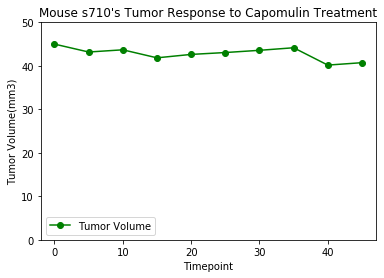

In [111]:
#Create series to look for Mouse ID and return tumor volume across treatment
selected_mouse = df.loc[df["Mouse ID"] == mouse_id][["Timepoint", "Tumor Volume (mm3)"]]
x_axis = selected_mouse["Timepoint"]
y_axis = selected_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color="green", label = "Tumor Volume", marker="o")
plt.title("Mouse " + mouse_id + "'s Tumor Response to Capomulin Treatment")
plt.xlabel("Timepoint")

plt.ylabel("Tumor Volume(mm3)")
plt.ylim(0,(y_axis.max()+5))
plt.xlim(0-2, (x_axis.max()+2))
plt.legend(loc="lower left")
plt.show()

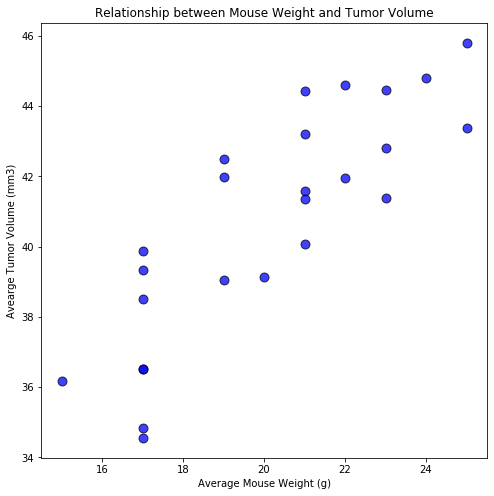

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = cap_df.groupby("Mouse ID").mean()["Weight (g)"]
tumor_volume = cap_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

plt.figure(figsize=(8,8))


plt.scatter(mouse_weight, tumor_volume, marker="o", facecolors="blue", edgecolors="black", s=80, alpha=0.75)
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Avearge Tumor Volume (mm3)")
plt.title("Relationship between Mouse Weight and Tumor Volume")

plt.show()

## Correlation and Regression

In [16]:
correlation = sts.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between mouse body weight and tumor volume is {round(correlation[0],2)}")

The correlation between mouse body weight and tumor volume is 0.84


The r-squared is: 0.7088568047708717


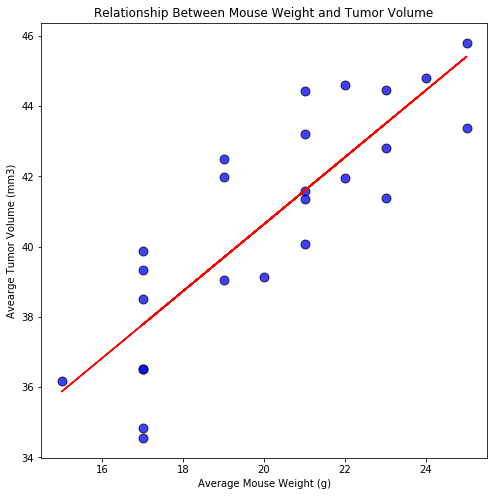

In [17]:
mouse_weight = cap_df.groupby("Mouse ID").mean()["Weight (g)"]
tumor_volume = cap_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8,8))

plt.scatter(mouse_weight, tumor_volume, marker="o", facecolors="blue", edgecolors="black", s=80, alpha=0.75)
plt.plot(mouse_weight, regress_values, "r-")
# plt.annotate(line_eq,(8,8),fontsize=15,color="green")

plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Avearge Tumor Volume (mm3)")
plt.title("Relationship Between Mouse Weight and Tumor Volume")


print(f"The r-squared is: {rvalue**2}")
plt.show()
